In [1]:
!unzip /content/dataset.zip


Archive:  /content/dataset.zip
  inflating: imbalanced_data.csv     
  inflating: raw_data.csv            


In [2]:
import pandas as pd

In [3]:
imbalance_data=pd.read_csv('/content/imbalanced_data.csv')

In [4]:
imbalance_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


EDA

In [5]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

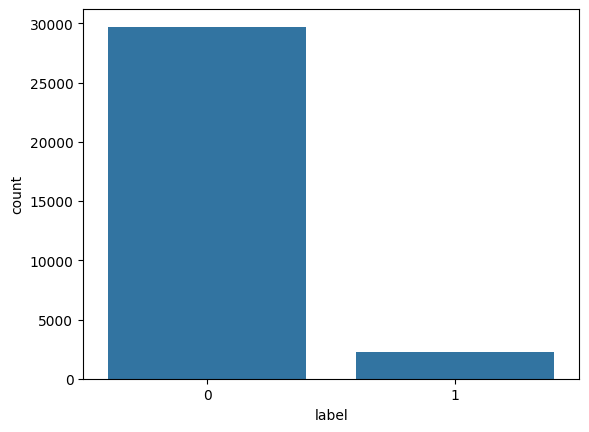

In [6]:
sns.countplot(x='label', data=imbalance_data)


0 ---> No hate
1 ---> Hate

In [7]:
imbalance_data.shape


(31962, 3)

In [8]:
imbalance_data.isnull().sum()


,0
id,0
label,0
tweet,0


In [9]:
imbalance_data.drop("id", axis=1, inplace=True)


In [10]:
raw_data = pd.read_csv("/content/raw_data.csv")


In [11]:
raw_data.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [12]:
raw_data.shape


(24783, 7)

In [13]:
raw_data.isnull().sum()


,0
Unnamed: 0,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


<Axes: xlabel='class', ylabel='count'>

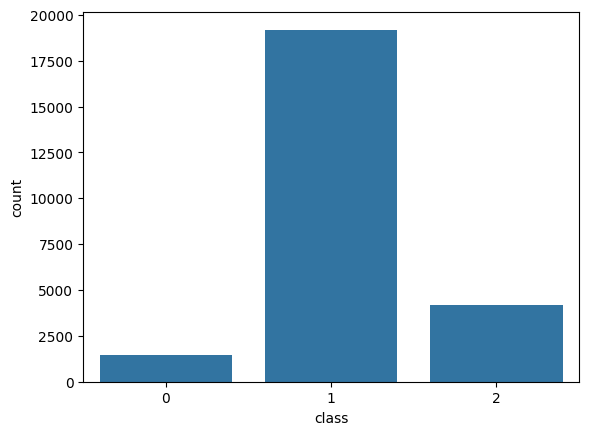

In [14]:
sns.countplot(x='class',data =raw_data)


class 0: hate
class 1: abusive
class 2: no hate





In [15]:
# Let's copy the valus of the class 1 into class 0.
raw_data[raw_data['class']==0]['class']=1

<ipython-input-15-721e9eb82406>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data[raw_data['class']==0]['class']=1


In [16]:
raw_data.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [17]:
raw_data['class'].unique()


array([2, 1, 0])

In [18]:
# replace the value of 0 to 1
raw_data["class"].replace({0:1},inplace=True)

<ipython-input-18-f7cf732ce13e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data["class"].replace({0:1},inplace=True)


In [19]:
raw_data["class"].unique()


array([2, 1])

<Axes: xlabel='class', ylabel='count'>

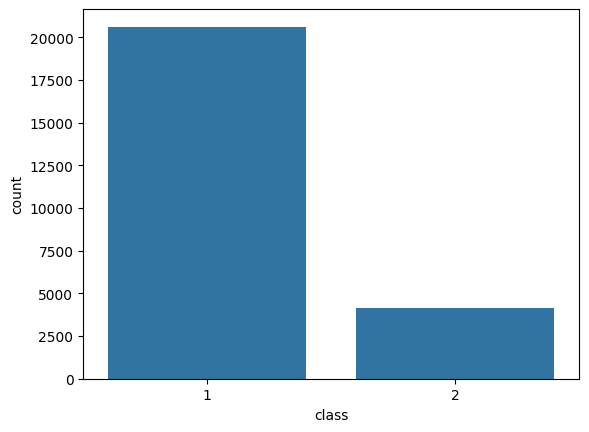

In [20]:
sns.countplot(x="class",data= raw_data)


In [21]:
# Let's replace the value of 2 to 0.
raw_data["class"].replace({2:0}, inplace = True)

<ipython-input-21-9b0d7a7a0399>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data["class"].replace({2:0}, inplace = True)


In [22]:
imbalance_data.head()


,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [23]:

# Let's change the name of the 'class' to label
raw_data.rename(columns={'class':'label'},inplace =True)

In [24]:
# Let's concatinate both the data into a single data frame.
frame = [imbalance_data, raw_data]
df = pd.concat(frame)

<Axes: xlabel='label', ylabel='count'>

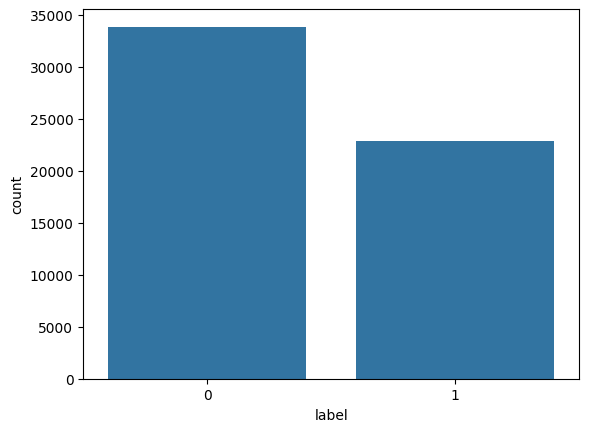

In [25]:
sns.countplot(x='label',data=df)


Preprocessing


In [26]:
import re
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
# Let's apply stemming and stopwords on the data
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

In [29]:
# Let's apply regex and do cleaning.
def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopword]
    words=" ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words=" ".join(words)

    return words

In [30]:
df["tweet"][1]


,tweet
1,@user @user thanks for #lyft credit i can't us...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...


In [31]:
# let's apply the data_cleaning on the data.
df['tweet']=df['tweet'].apply(data_cleaning)

In [32]:
df["tweet"][1]


,tweet
1,user user thanks for lyft credit i cant use ca...
1,rt boy dats coldtyga dwn bad for cuffin dat ...


In [33]:
x = df['tweet']
y = df['label']

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
# Let's split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

42558 42558
14187 14187


Feature engineering


In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences


In [44]:
max_words = 50000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [45]:
sequences_matrix

array([[    0,     0,     0, ...,   207, 13071,  4452],
       [    0,     0,     0, ...,   248,     3,   654],
       [    0,     0,     0, ...,     1,  1832, 41022],
       ...,
       [ 1126,   669,  2785, ...,   187,     1, 33472],
       [    0,     0,     0, ...,   954, 14419,   774],
       [    0,     0,     0, ...,   419,   378,    13]], dtype=int32)

In [46]:
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from keras.optimizers import RMSprop


In [47]:
# Creating model architecture.
model = Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


In [49]:
history = model.fit(sequences_matrix,y_train,batch_size=128,epochs = 1,validation_split=0.2)


266/266 ━━━━━━━━━━━━━━━━━━━━ 154s 547ms/step - accuracy: 0.8390 - loss: 0.3763 - val_accuracy: 0.9368 - val_loss: 0.1849


In [50]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [51]:
# Model evaluation
accr = model.evaluate(test_sequences_matrix,y_test)

444/444 ━━━━━━━━━━━━━━━━━━━━ 56s 126ms/step - accuracy: 0.9300 - loss: 0.1916


In [52]:
lstm_prediction = model.predict(test_sequences_matrix)


444/444 ━━━━━━━━━━━━━━━━━━━━ 55s 124ms/step


In [53]:
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)



In [54]:
from sklearn.metrics import confusion_matrix


In [55]:
print(confusion_matrix(y_test,res))


[[8101  352]
 [ 654 5080]]


In [56]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [57]:
# Let's save the mdoel.
model.save("model.h5")


In [58]:
import keras


In [59]:
load_model=keras.models.load_model("model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [61]:
# Let's test our model on custom data.
test = 'i love this movie'

def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

test=[clean_text(test)]
print(test)

seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)

pred = load_model.predict(padded)

print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")

i love this movie
i love this movie
['love movi']
[[28, 5906]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
pred [[0.06866283]]
no hate
